# Programming Exercise 7: Principle Component Analyses

## Introduction

In this exercise, you will use principal component analysis to find a low-dimensional representation of face images. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics. We have included a few files for you in this exercise: 

- displayData.m - Displays 2D data stored in a matrix
- drawLine.m - Draws a line over an exsiting figure
- ex7data1.m - Example Dataset for PCA
- ex7faces.mat - Faces Dataset
- plotDataPoints.m - Initialization for K-means centroids
- plotProgressivekMeans.m - Plots each step of K-means as it proceeds
- bird_small.png - Example Image

You only have to implement these three functions:

- pca.m - Perform principal component analysis
- projectData.m - Projects a data set into a lower dimensional space
- recoverData.m - Recovers the original data from the projection

The contained files are found in File ==> Open... We highly recommend that you take a look at them as you make progress in this exercise. 

### NOTE:

You will find cells which contain the comment % GRADED FUNCTION: functionName. Do not edit that comment. Those cells will be used to grade your assignment. Each block of code with that comment should only have the function. 

Instructions will be provided as needed in the exercise. 


#### When you are done and submit the assignment, click here to check your [submission](https://www.coursera.org/learn/ml-test-jupyter/programming/LDdgE). 

Principal Component Analysis
============================

Now we will use principal component analysis (PCA) to
perform dimensionality reduction. You will first experiment with an
example 2D dataset to get an intuition of how PCA works, and then use it on
a bigger dataset of 5000 face image dataset.


Example Dataset
---------------

To help you understand how PCA works, you will first start with a 2D
dataset which has one direction of large variation and one of smaller
variation. In this part of the exercise, you will
visualize what happens when you use PCA to reduce the data from 2D to
1D. In practice, you might want to reduce data from 256 to 50
dimensions, say; but using lower dimensional data in this example allows
us to visualize the algorithms better.

<img src="readonly/figure 4.png" width="500" height="500">



Implementing PCA
----------------

PCA consists of
two computational steps: First, you compute the covariance matrix of the
data. Then, you use Octave/MATLAB’s SVD function to compute the
eigenvectors $U_1,U_2,\ldots,U_n$. These will correspond to the
principal components of variation in the data.

Before using PCA, it is important to first normalize the data by
subtracting the mean value of each feature from the dataset, and scaling
each dimension so that they are in the same range. In the provided
script below, this normalization has been performed for you
using the featureNormalize function.

After normalizing the data, you can run PCA to compute the principal
components. Your task is to complete the code in *pca* to compute
the principal components of the dataset. First, you should compute the
covariance matrix of the data, which is given by:
$$\Sigma = \frac{1}{m}X^TX$$ where $X$ is the data matrix with examples
in rows, and $m$ is the number of examples. Note that $\Sigma$ is a
$n\times n$ matrix and not the summation operator.

After computing the covariance matrix, you can run SVD on it to compute
the principal components. In Octave/MATLAB, you can run SVD with the
following command: [U, S, V] = svd(Sigma), where U will
contain the principal components and S will contain a diagonal
matrix.

<img src="readonly/figure 5.png" width="500" height="500">

**Implementation**:


[U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X. It returns the eigenvectors U, the eigenvalues (on diagonal) in S. You should first compute the covariance matrix. Then, you
              should use the "svd" function to compute the eigenvectors
              and eigenvalues of the covariance matrix. 

Note: When computing the covariance matrix, remember to divide by m (the
      number of examples).




In [1]:
% GRADED FUNCTION: pca
function [U, S] = pca(X)

[m, n] = size(X);    % Useful values
U = zeros(n);        % Return the following variables correctly.
S = zeros(n);

% ====================== YOUR CODE HERE ======================
Sigma = X'*X * 1/m;
[U, S, V] = svd(Sigma);

% =============================================================
end 

Now that you have completed *pca*, we will run PCA on the example dataset and plot the corresponding principal components found (Figure 5). You will also get an output of
the top principal component (eigenvector) found, and you should expect
to see an output of about [-0.707 -0.707]. (It is possible that
Octave/MATLAB may instead output the negative of this, since $U_1$ and
$-U_1$ are equally valid choices for the first principal component.)

ans = -0.70711
ans = -0.70711


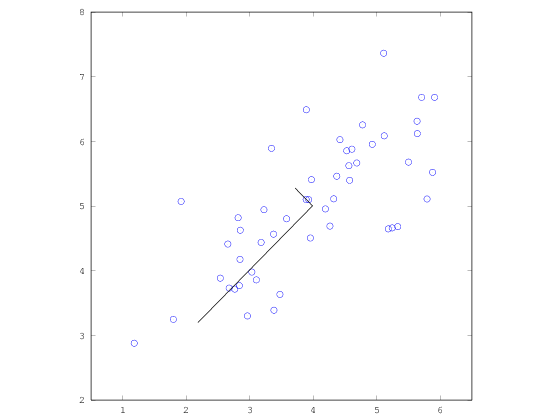

In [2]:
warning('off'); addpath('readonly');
% Visualize the dataset
load ('ex7data1.mat');
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

[X_norm, mu, sigma] = featureNormalize(X);       %  Before running PCA, it is important to first normalize X
[U, S] = pca(X_norm);                            %  Run PCA
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);  % Drawing the eigenvectors centered at mean of data. 
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);  % The lines show direction of max. variation
hold off;
U(1,1)
U(2,1)

**Expected Output**: 

-0.707107 -0.707107

Dimensionality Reduction with PCA
---------------------------------

After computing the principal components, you can use them to reduce the
feature dimension of your dataset by projecting each example onto a
lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting
the data from 2D to 1D). You will use the
eigenvectors returned by PCA and project the example dataset into a
1-dimensional space.

In practice, if you were using a learning algorithm such as linear
regression or perhaps neural networks, you could now use the projected
data instead of the original data. By using the projected data, you can
train your model faster as there are less dimensions in the input.

### Projecting the data onto the principal components

You should now complete the code below in the projectData function. Specifically,
you are given a dataset $X$, the principal components $U$, and
the desired number of dimensions to reduce to $K$. You should
project each example in $X$ onto the top $K$ components in
$U$. Note that the top $K$ components in $U$ are given by
the first $K$ columns of U, that is U_reduce $= U(:, 1:K)$.

Once you have completed the code in the function below,
you could run the cell below it to project the first example onto the first
dimension. Given that you implemented projectData correctly, you will see what the data looks like when 
using only the corresponding eigenvectors to reconstruct it.


**Implementation**: 

Z = **projectData(X, U, K)** computes the projection of the normalized inputs X into the reduced dimensional space spanned by the first K columns of U. It returns the projected examples in Z. You should compute the projection of the data using only the top K 
              eigenvectors in U (first K columns). 
              For the i-th example X(i,:), the projection on to the k-th 
              eigenvector is given as follows:
                   x = X(i, :)';
                   projection_k = x' * U(:, 1:k);



In [3]:
% GRADED FUNCTION: projectData
function Z = projectData(X, U, K)

Z = zeros(size(X, 1), K);                      % Return the following variable correctly.

% ====================== YOUR CODE HERE ======================

Z = X*U(:, 1:K);

% =============================================================
end

ans =  1.4813


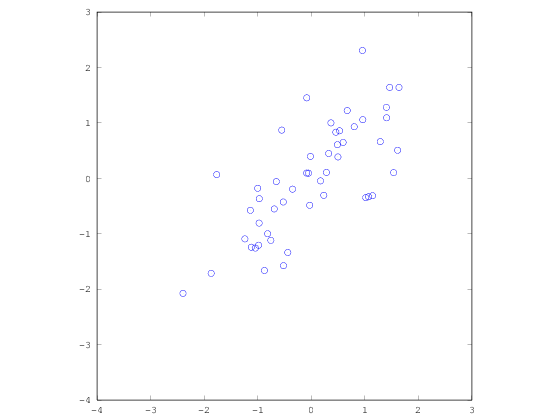

In [4]:
%  Dimension reduction on example dataset
plot(X_norm(:, 1), X_norm(:, 2), 'bo');        %  Plot the normalized dataset (returned from pca)
axis([-4 3 -4 3]); axis square

K = 1;                                         %  Project the data onto K = 1 dimension
Z = projectData(X_norm, U, K);
Z(1)


**Expected Output**: 

1.481 (or possibly -1.481, if you got $-U_1$ instead of $U_1$)

### Reconstructing an approximation of the data

After projecting the data onto the lower dimensional space, you can
approximately recover the data by projecting them back onto the original
high dimensional space. Your task is to complete *recoverData* to
project each example in $Z$ back onto the original space and return
the recovered approximation in $X\_rec$.

**Implementation:**

X_rec = **recoverData**(Z, U, K) recovers an approximation the original data that has been reduced to K dimensions. It returns the approximate reconstruction in X_rec. You should compute the approximation of the data by projecting back onto the original space using the top K eigenvectors in U.
For the i-th example Z(i,:), the (approximate) recovered data for dimension j is given as follows:

x = Z(i, :)';

projection_k = x' * U(j, 1:K)';
             
Notice that U(j, 1:K) is a row vector.
    

In [5]:
% GRADED FUNCTION: recoverData
function X_rec = recoverData(Z, U, K)

X_rec = zeros(size(Z, 1), size(U, 1));      % Return the following variables correctly.

% ====================== YOUR CODE HERE ======================

X_rec = Z*U(:,1:K)';


% ============================================================

end

In [6]:
% Testing your function 
X_rec  = recoverData(Z, U, K);
X_rec(1, 1)
X_rec(1, 2)

ans = -1.0474
ans = -1.0474


**Expected Output**:

[-1.047 -1.047]

### Visualizing the projections

<img src="readonly/figure 6.png" width="500" height="500">



After completing both *projectData* and *recoverData*,
we will now perform both the projection and approximate
reconstruction to show how the projection affects the data. In Figure
6, the original data points are indicated with the blue
circles, while the projected data points are indicated with the red
circles. The projection effectively only retains the information in the
direction given by $U_1$.

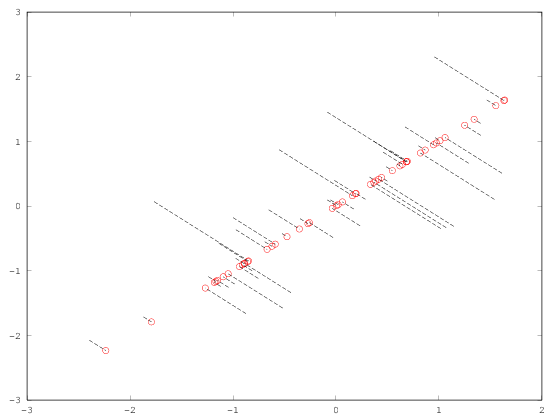

In [7]:
hold on;                                   %  Draw lines connecting the projected points to the original points
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
end
hold off

Face Image Dataset
------------------

Now, you will run PCA on face images to see how
it can be used in practice for dimension reduction. The dataset
ex7faces.mat contains a dataset X of face images, each
$32\times32$ in grayscale. Each row of X corresponds to one face
image (a row vector of length $1024$). The next step below will load and visualize the first 100 of these face
images (Figure 7).

<img src="readonly/figure 7.png" width="500" height="500">

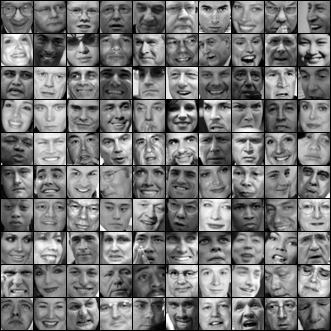

In [8]:
load ('ex7faces.mat')             %  Load Face dataset
displayData(X(1:100, :));         %  Display the first 100 faces in the dataset

### PCA on Faces

To run PCA on the face dataset, we first normalize the dataset by
subtracting the mean of each feature from the data matrix X. The
cell below will do this for you and it will then run your PCA
code. After running PCA, you will obtain the principal components of the
dataset. Notice that each principal component in U (each row) is
a vector of length $n$ (where for the face dataset, $n=1024$). It turns
out that we can visualize these principal components by reshaping each
of them into a $32\times32$ matrix that corresponds to the pixels in the
original dataset. Then we display the first 36
principal components that describe the largest variations (Figure
8). If you want, you can also change the code to
display more principal components to see how they capture more and more
details.

<img src="readonly/figure 8.png" width="500" height="500">

Below we run PCA and visualize the eigenvectors which are in this case eigenfaces. We display the first 36 eigenfaces.
This might take 1 to 2 minutes. 

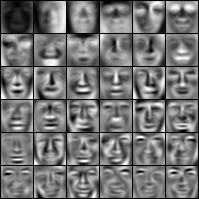

In [9]:
load ('ex7faces.mat')  
[X_norm, mu, sigma] = featureNormalize(X);   % We first normalize X by subtracting the mean value from each feature

[U, S] = pca(X_norm);                        %  Run PCA

displayData(U(:, 1:36)');                    %  Visualize the top 36 eigenvectors found

### Dimensionality Reduction

<img src="readonly/figure 9.png" width="800" height="800">


Now that you have computed the principal components for the face
dataset, you can use it to reduce the dimension of the face dataset.
This allows you to use your learning algorithm with a smaller input size
(e.g., 100 dimensions) instead of the original 1024 dimensions. This can
help speed up your learning algorithm.

The next part below will project the face dataset onto
only the first 100 principal components. Concretely, each face image is
now described by a vector $z^{(i)} \in \mathbb{R}^{100}$.

To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset. An approximate recovery of the data is performed. The original and projected face images are displayed side by side (Figure 9). From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10×) in the dataset size that can help speed up your learning algorithm significantly. For example, if you were training a neural network to perform person recognition (given a face image, predict the identity of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

**Implementation**:

Below we project images to the eigen space using the top K eigen vectors and visualize only using those K dimensions. We compare our final image to the original input, which is also displayed.


size_of_z =

   5000    100



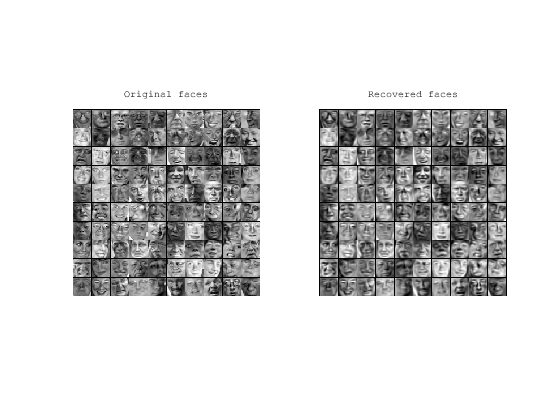

In [10]:
K = 100;
Z = projectData(X_norm, U, K);
size_of_z = size(Z)                    % Size of our new Z

K = 100;
X_rec  = recoverData(Z, U, K);

subplot(1, 2, 1);                      % Display normalized data
displayData(X_norm(1:100,:));
title('Original faces');
axis square;

subplot(1, 2, 2);                      % Display reconstructed data from only k eigenfaces
displayData(X_rec(1:100,:));
title('Recovered faces');
axis square;



Optional (ungraded) exercise: PCA for visualization
---------------------------------------------------

<img src="readonly/figure 10.png" width="600" height="600">


In the earlier $K$-means image compression exercise, you used the
$K$-means algorithm in the 3-dimensional RGB space. Above, we have provided code to visualize the
final pixel assignments in this 3D space using the scatter3
function. Each data point is colored according to the cluster it has
been assigned to. You can drag your mouse on the figure to rotate and
inspect this data in 3 dimensions.

<img src="readonly/figure 11.png" width="500" height="500">


It turns out that visualizing datasets in 3 dimensions or greater can be
cumbersome. Therefore, it is often desirable to only display the data in
2D even at the cost of losing some information. In practice, PCA is
often used to reduce the dimensionality of data for visualization
purposes. Below, the cell will apply your implementation of PCA to the 3-dimensional data to reduce it to 2
dimensions and visualize the result in a 2D scatter plot. The PCA
projection can be thought of as a rotation that selects the view that
maximizes the spread of the data, which often corresponds to the “best”
view.

**Implementation**: 

One useful application of PCA is to use it to visualize high-dimensional data. In the last K-Means exercise you ran K-Means on 3-dimensional pixel colors of an image. We first visualize this output in 3D, and then apply PCA to obtain a visualization in 2D.


error: binary operator '/' not implemented for 'scalar struct' by 'scalar' operations
error: reshape: can't reshape 1x1 array to 1x3 array
gfd
K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...
gfd
gfd
gfdgfdgfd


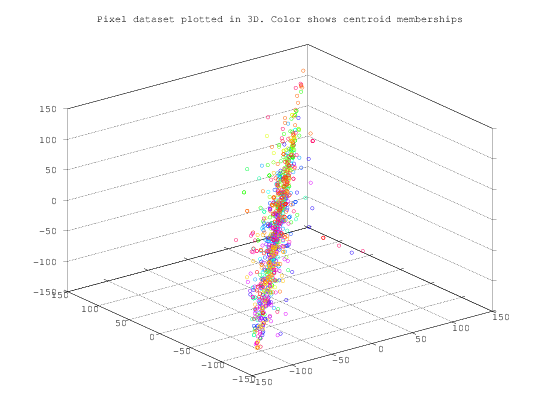

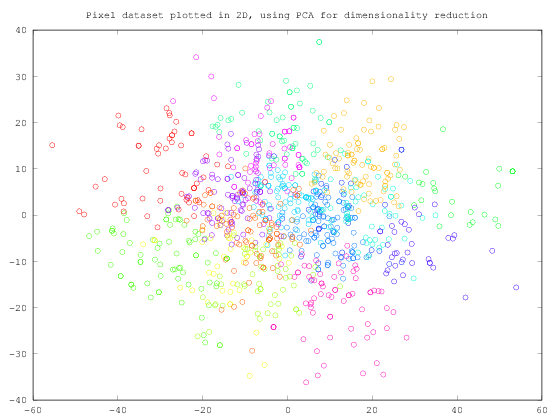

In [12]:
% Re-load the image from the previous exercise and run K-Means on it
% For this to work, you need to complete the K-Means assignment first
A = imread("bird_small.mat");

A = A / 255;
img_size = size(A);
X = reshape(A, img_size(1) * img_size(2), 3);
K = 16; 
max_iters = 10;
initial_centroids = kMeansInitCentroids(X, K);
fprintf("gfd");

[centroids, idx] = runkMeans(X, initial_centroids, max_iters);
fprintf("gfd");


%  Sample 1000 random indexes (since working with all the data is
%  too expensive. If you have a fast computer, you may increase this.
sel = floor(rand(1000, 1) * size(X, 1)) + 1;

%  Setup Color Palette
palette = hsv(K);
colors = palette(idx(sel), :);
fprintf("gfd");


%  Visualize the data and centroid memberships in 3D
figure;
scatter3(X(sel, 1), X(sel, 2), X(sel, 3), 10, colors);
title('Pixel dataset plotted in 3D. Color shows centroid memberships');


% Use PCA to project this cloud to 2D for visualization
% Subtract the mean to use PCA
[X_norm, mu, sigma] = featureNormalize(X);

% PCA and project the data to 2D
[U, S] = pca(X_norm);
Z = projectData(X_norm, U, 2);

% Plot in 2D
figure;
plotDataPoints(Z(sel, :), idx(sel), K);
title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');
